In [75]:
%load_ext autoreload
%autoreload 2
import builtins
from IPython.lib import deepreload
builtins.reload = deepreload.reload
import helpers
from helpers import read_df_from_dir, filter_by
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
#print(mpl.style.available)
mpl.style.use("bmh")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
path="../logs/scaling/"

In [77]:
df = read_df_from_dir(path)
df.sort_values(by=["nb_gpus"],inplace=True)

In [78]:
#df_plot=df_filtered.groupby([key],as_index=False).mean()
#filters={"problem":"conv2d_2"}
#key_secondary="framework"

#df = filter_by(df,filters)
#df=df_filtered.groupby([key,"framework"],as_index=False).mean()
#df

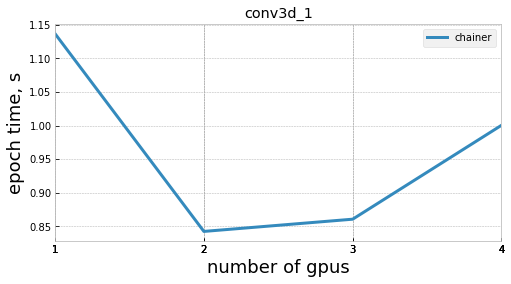

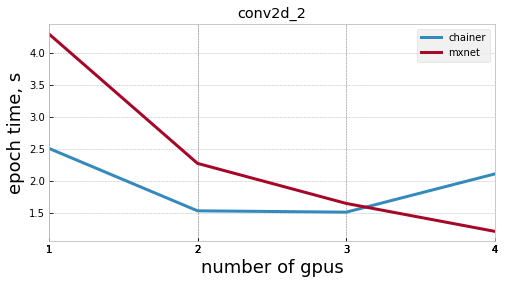

In [85]:
mpl.rcParams["figure.figsize"] = 8,4
key="nb_gpus"

for problem in df["problem"].unique():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,facecolor='white')
   

    for framework in df["framework"].unique():
        filters={"framework":framework,"problem":problem}
        df_filtered = filter_by(df,filters)
        df_plot=df_filtered.groupby([key],as_index=False).mean()
        if df_plot.shape[0] > 0:
            df_plot.plot(x="nb_gpus",y="time",ax=ax, label=framework, linewidth=3)
        
    ax.set_xlabel("number of gpus",size=18)
    ax.set_ylabel("epoch time, s",size=18)
    ax.set_xticks(df["nb_gpus"])
    plt.title(problem)
    plt.show()
    
None


#for problem in df["problem"].unique():
    #render(key="framework",filters={"device":"E5-2699","problem":problem},color="dodgerblue")
 #   render(key="framework",filters={"device":"P100-PCIE","problem":problem},color="yellowgreen")
